‫ﻣﺨﺘﺼــﺎت‬
‫‪y‬‬‫اﯾــﻦ‬ ‫ﺗﺼﺎوﯾــﺮ‬ ‫ﺑــﺎ‬ ‫‪feature_1‬‬ ‫و‬ ‫ﻣﺨﺘﺼــﺎت‬ ‫‪x‬‬ ‫آن‬ ‫ﻫــﺎ‬‫ﺑــﺎ‬ ‫‪feature_2‬‬ ‫ﻧﺎم‬ ‫ﮔــﺬاری‬
‫ﺷــﺪه‬‫اﺳــﺖ‪.‬‬

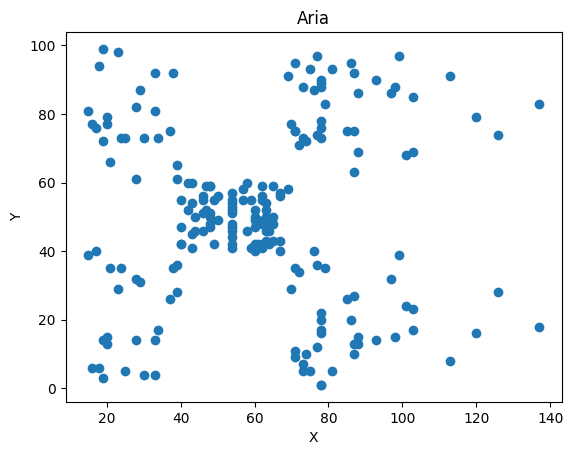

In [56]:
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./rc_task_2.csv')
data = df


plt.scatter(df['feature_2'], df['feature_1'])
# add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Aria')

plt.show()



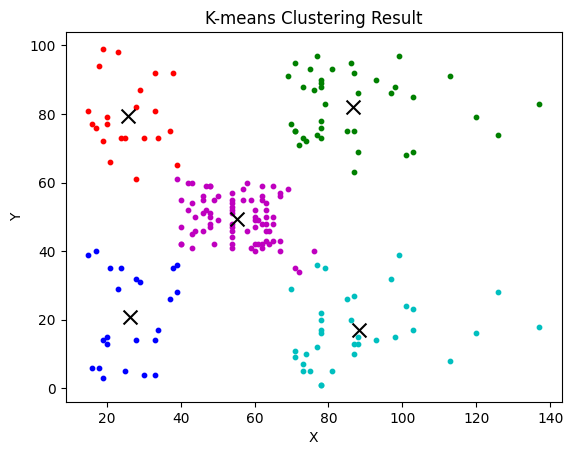

In [55]:
def kmeans_pp(X, K):

    centroids = np.zeros((K, X.shape[1]))
    centroids[0] = X[np.random.choice(X.shape[0])]

    distances = np.zeros(X.shape[0])
    for i in range(1, K):
        for j, x in enumerate(X):
            distances[j] = np.min(np.sum((x - centroids[:i]) ** 2, axis=1))

        probabilities = distances / np.sum(distances)
        centroids[i] = X[np.random.choice(X.shape[0], p=probabilities)]

    return centroids


def kmeans(X, K, max_iter=100):
    centroids = kmeans_pp(X, K)

    for iter in range(max_iter):
        distances = np.sum((X[:, np.newaxis] - centroids) ** 2, axis=2)
        labels = np.argmin(distances, axis=1)
        for i in range(K):
            centroids[i] = np.mean(X[labels == i], axis=0)

    colors = ['r', 'g', 'b', 'c', 'm']
    for i in range(K):
        plt.scatter(X[labels == i, 0], X[labels == i, 1], c=colors[i], s=10)

    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='k', s=100)
    plt.title('K-means Clustering Result')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

    return labels, centroids

np.random.seed(42)
X = np.array(data[['feature_2', 'feature_1']])




labels, centroids = kmeans(X, K=5)
data['label'] = labels
data.to_csv('./rc_task_2_labeled.csv', index=False)